# Accuracy of Various Models for Heart Disease Detection:

The aim of this project is to predict whether a patient has a high risk of having a heart disease or not. This problem is a classification problem as the outputs for "Heart Attack Risk" as either:

- 0 = the patient is not at risk
- 1 = the patient is at risk


In this project we will use different methods to make our predictions, which means we will train different models and compare their performances. I try to keep this notebook as simple as possible, as the goal of this project is not to do some overlly verbose EDA. However a deeper dive into preprocessing and feature engineering might help to imporve the accuracy.

## Import and clean data :

In [91]:
import pandas as pd

file_path = "./datasets/dataset.csv"

heart_disease = pd.read_csv(file_path)
heart_disease.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


Let's first check that we actually need to do some classification and not a regression :

In [92]:
print(heart_disease['Heart Attack Risk'].value_counts())

Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64


As we can see, only two values exist for the "Heart Attack Risk" : we need to perform classification.

Next, we need to extract the aim column (the one we need to predict):  this will be the "label", named y.  
We also get rid of some columns because they are hard to deal with( for example the "Blood Pressure" feature is in a specific format which I do not want to look up. Therefore we will just leave it out :)  
We are also getting rid of the "Country" feature: the reason for that is we want to have an idea of the location, but "Country" is too precise, and "Hemisphere" + "Continent" already give us a good idea for the global location of a person.

In [93]:
y = heart_disease["Heart Attack Risk"]

dropped_columns = ["Country","Blood Pressure","Patient ID","Heart Attack Risk"]
X = heart_disease.drop(dropped_columns,axis=1)
X.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Continent,Hemisphere
0,67,Male,208,72,0,0,1,0,0,4.168189,...,0,9,6.615001,261404,31.251233,286,0,6,South America,Southern Hemisphere
1,21,Male,389,98,1,1,1,1,1,1.813242,...,0,1,4.963459,285768,27.194973,235,1,7,North America,Northern Hemisphere
2,21,Female,324,72,1,0,0,0,0,2.078353,...,1,9,9.463426,235282,28.176571,587,4,4,Europe,Northern Hemisphere
3,84,Male,383,73,1,1,1,0,1,9.828130,...,0,9,7.648981,125640,36.464704,378,3,4,North America,Northern Hemisphere
4,66,Male,318,93,1,1,1,1,0,5.804299,...,0,6,1.514821,160555,21.809144,231,1,5,Asia,Northern Hemisphere


Let's check if we have some missing values :

In [94]:
X.isnull().values.any()

False

Let's implement a very simple pipeline : treating the categorical arguments

In [95]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder

pipeline = Pipeline(steps=[
    ("encoder", OrdinalEncoder())
])

X = pipeline.fit_transform(X)

In [96]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#columns_to_scale = ['Age', 'Cholesterol', 'BMI']

X = scaler.fit_transform(X)
print(X)

[[0.68055556 1.         0.31428571 ... 0.33333333 1.         1.        ]
 [0.04166667 1.         0.96071429 ... 0.5        0.8        0.        ]
 [0.04166667 0.         0.72857143 ... 0.         0.6        0.        ]
 ...
 [0.40277778 1.         0.46428571 ... 0.         1.         1.        ]
 [0.25       1.         0.20714286 ... 0.66666667 1.         1.        ]
 [0.09722222 0.         0.84285714 ... 0.         0.6        0.        ]]


Spliting the new dataset in a train set and a test set:

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Model 1: KNeighborsClassifier

First we will try to use a basic classifier using the K nearest neighbors. We are going to build a loop to find out what number of neighbors actually gives us the best accuracy :

Accuracy for 5 neighbors : 0.5681688533941814
Accuracy for 10 neighbors : 0.6103822019395322
Accuracy for 15 neighbors : 0.6126640045636053
Accuracy for 20 neighbors : 0.6303479749001711
Accuracy for 25 neighbors : 0.6200798630918426
Accuracy for 30 neighbors : 0.6292070735881347
Accuracy for 35 neighbors : 0.6286366229321164
Accuracy for 40 neighbors : 0.6343411294922989
Accuracy for 45 neighbors : 0.6349115801483172
Accuracy for 50 neighbors : 0.6354820308043354
Accuracy for 55 neighbors : 0.6349115801483172
Accuracy for 60 neighbors : 0.6343411294922989
Accuracy for 65 neighbors : 0.6343411294922989
Accuracy for 70 neighbors : 0.6349115801483172
Accuracy for 75 neighbors : 0.6360524814603536
Accuracy for 80 neighbors : 0.6360524814603536
Accuracy for 85 neighbors : 0.6354820308043354
Accuracy for 90 neighbors : 0.6349115801483172
Accuracy for 95 neighbors : 0.6354820308043354
Accuracy for 100 neighbors : 0.6354820308043354
Accuracy for 105 neighbors : 0.6354820308043354
Accuracy for

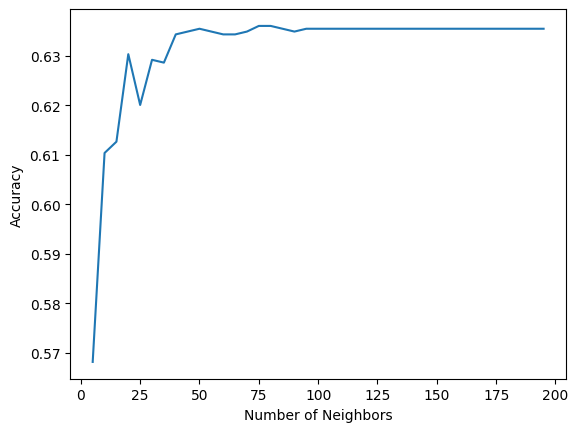

In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import numpy as np

n_neighbors = list(range(5,200,5))
acc_list=[]
max_acc_knn = 0
best_neighbor_knn = 0

for i in n_neighbors:
    model_1 = KNeighborsClassifier(n_neighbors=i)
    model_1.fit(X_train,y_train)
    prediction_1 = model_1.predict(X_test)
    accuracy = accuracy_score(prediction_1, y_test)
    if accuracy > max_acc_knn :
        max_acc_knn = accuracy
        best_neighbor_knn = i
    acc_list.append(accuracy)
    print(f"Accuracy for {i} neighbors : {accuracy}")

print(f"\n The optimal number of neighbors is {best_neighbor_knn} with an accuracy of {max_acc_knn} \n")

plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.plot(n_neighbors, acc_list)
plt.show()


To analyse the predictions, we can use the **Confusion Matrix**, which is a table used to evaluate the performance of a classification model.

In [99]:
from sklearn.metrics import confusion_matrix

model_1 = KNeighborsClassifier(n_neighbors=65)
model_1.fit(X_train,y_train)
prediction_1 = model_1.predict(X_test)

cm_1 = confusion_matrix(prediction_1, y_test)
print(cm_1)
print(accuracy_score(prediction_1, y_test))

[[1112  639]
 [   2    0]]
0.6343411294922989


In [100]:
prediction_2 = model_1.predict(X_train)
cm_2 = confusion_matrix(prediction_2, y_train)
print(cm_2)
print(accuracy_score(prediction_2, y_train))

[[4492 2480]
 [  18   20]]
0.6436519258202568


As we can see, most of the predictions are TP (True Positive) or FP (False Positive): our model guesses that there is no heart risk in 99% of cases... But if we check the predictions of our model on the training set, we see that the accuracy is 0.64, so our model is not overfitting. Maybe using a more complex model would help...

## Model 2 : Gradient Boosting Classifier 

Accuracy with 10 estimators : 0.6354820308043354
Accuracy with 20 estimators : 0.6349115801483172
Accuracy with 30 estimators : 0.6349115801483172
Accuracy with 40 estimators : 0.6349115801483172
Accuracy with 50 estimators : 0.6337706788362807
Accuracy with 60 estimators : 0.6349115801483172
Accuracy with 70 estimators : 0.6337706788362807
Accuracy with 80 estimators : 0.6343411294922989
Accuracy with 90 estimators : 0.6332002281802624

 The optimal number of estimators is 10 with an accuracy of 0.6354820308043354 



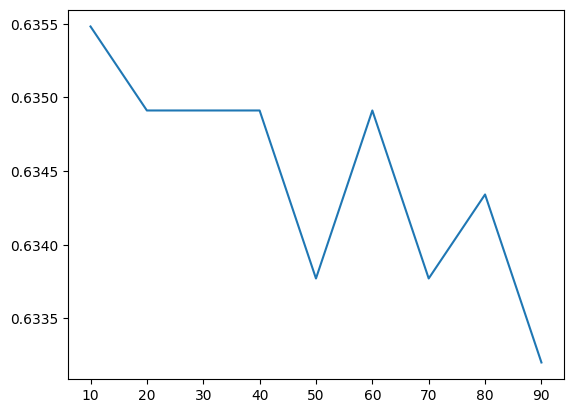

In [101]:
from sklearn.ensemble import GradientBoostingClassifier

acc_list=[]
est_list=[]
max_acc_gb=0
best_estimator_gb=0

for i in range(10,100,10):
    model_2 = GradientBoostingClassifier(n_estimators=i)
    model_2.fit(X_train,y_train)
    prediction_2 = model_2.predict(X_test)
    accuracy = accuracy_score(prediction_2, y_test)
    if accuracy > max_acc_gb :
        max_acc_gb = accuracy
        best_estimator_gb = i
    acc_list.append(accuracy)
    est_list.append(i)
    print(f"Accuracy with {i} estimators : {accuracy}")

print(f"\n The optimal number of estimators is {best_estimator_gb} with an accuracy of {max_acc_gb} \n")

plt.plot(est_list,acc_list)
plt.show()

## Model 3: Random Forest Classifier 

Accuracy with 10 estimators : 0.6041072447233314
Accuracy with 30 estimators : 0.6252139189960069
Accuracy with 50 estimators : 0.6326297775242442
Accuracy with 70 estimators : 0.6332002281802624
Accuracy with 90 estimators : 0.6343411294922989
Accuracy with 110 estimators : 0.6326297775242442
Accuracy with 130 estimators : 0.6337706788362807
Accuracy with 150 estimators : 0.6309184255561894
Accuracy with 170 estimators : 0.6309184255561894
Accuracy with 190 estimators : 0.6332002281802624
Accuracy with 210 estimators : 0.6354820308043354
Accuracy with 230 estimators : 0.6349115801483172

 The optimal number of estimators is 210 with an accuracy of 0.6354820308043354 



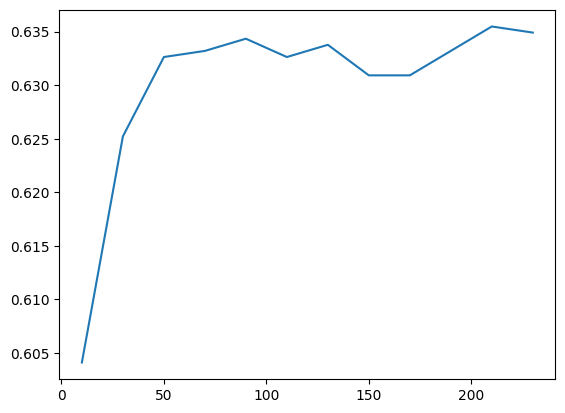

In [102]:
from sklearn.ensemble import RandomForestClassifier

acc_list=[]
est_list=[]
max_acc_rf=0
best_estimator_rf=0


for i in range(10,250,20):
    model_3 = RandomForestClassifier(random_state=0,n_estimators=i)
    model_3.fit(X_train,y_train)
    prediction_3 = model_3.predict(X_test)
    accuracy = accuracy_score(prediction_3, y_test)
    if accuracy > max_acc_rf :
        max_acc_rf = accuracy
        best_estimator_rf = i
    acc_list.append(accuracy)
    est_list.append(i)
    print(f"Accuracy with {i} estimators : {accuracy}")

print(f"\n The optimal number of estimators is {best_estimator_rf} with an accuracy of {max_acc_rf} \n")

plt.plot(est_list,acc_list)
plt.show()

## Comparing the accuracy for the different classification models : 

<BarContainer object of 3 artists>

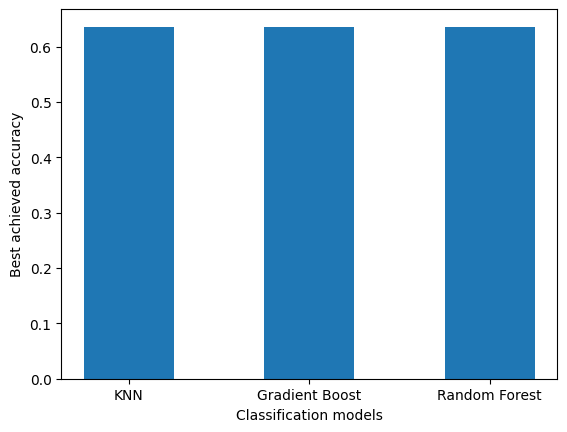

In [103]:
#Creating a bar plot : displaying the accuracy for each model used
list_acc_models = [max_acc_knn,max_acc_gb,max_acc_rf]
list_models_name=["KNN","Gradient Boost","Random Forest"]

plt.xlabel("Classification models")
plt.ylabel("Best achieved accuracy")
plt.bar(height=list_acc_models, x=list_models_name, width=0.5)

When optimising the models, we are able to achieve similar results with the three selected models (around 63.5 %). Again, it is important to mention that this is a very quick implementation of different models, but more work has to be done on the data and the hyperparameters in order to obtain the best results possible.